* [Linear Algebra]("https://julia.quantecon.org/tools_and_techniques/linear_algebra.html")

Taisei Noda
June 3rd 2020

# Vectors

In [1]:
using InstantiateFromURL
# optionally add arguments to force installation: instantiate = true, precompile = true
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.7.0")

Activated /Users/taisei/Project.toml
Info quantecon-notebooks-julia 0.5.0 activated, 0.7.0 requested


In [2]:
using LinearAlgebra, Statistics, Plots
gr(fmt=:png);

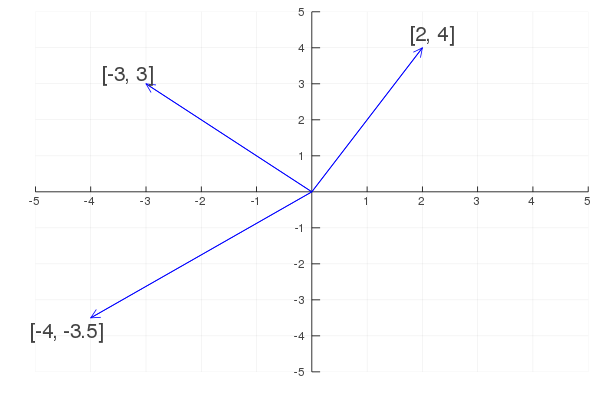

In [3]:
x_vals = [0 0 0 ; 2 -3 -4]
y_vals = [0 0 0 ; 4 3 -3.5]

plot(x_vals, y_vals, arrow = true, color = :blue,
     legend = :none, xlims = (-5, 5), ylims = (-5, 5),
     annotations = [(2.2, 4.4, "[2, 4]"),
                    (-3.3, 3.3, "[-3, 3]"),
                    (-4.4, -3.85, "[-4, -3.5]")],
     xticks = -5:1:5, yticks = -5:1:5,
     framestyle = :origin)


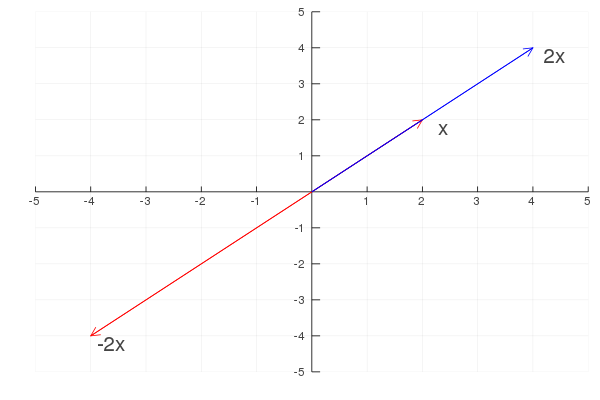

In [4]:
# sclar multiplication

x=[2]
scalars=[-2 1 2]
vals=[0 0 0; x*scalars]
labels=[(-3.6,-4.2,"-2x"),(2.4,1.8,"x"),(4.4,3.8,"2x")]
plot(vals,vals,arrow=true,color=[:red :red :blue],legend=:none,xlims=(-5,5),ylims=(-5,5),
    annotations=labels,xticks=-5:1:5,yticks=-5:1:5,framestyle=:origin)

In [5]:
x=ones(3)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [6]:
y=[2,4,6]

3-element Array{Int64,1}:
 2
 4
 6

In [7]:
x+y

3-element Array{Float64,1}:
 3.0
 5.0
 7.0

Both of them work.

## Inner Product and Norm

In [8]:
using LinearAlgebra

In [9]:
dot(x,y)

12.0

In [10]:
sum(prod,zip(x,y))

12.0

In [11]:
norm(x)

1.7320508075688772

In [12]:
sqrt(sum(abs2,x))

1.7320508075688772

## Span

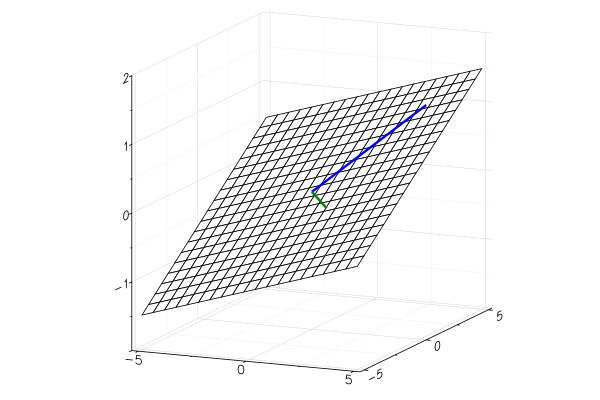

In [13]:
# fixed linear function, to generate a plane
f(x,y)=0.2x+0.1y

x_vec=[0 0;3 3]
y_vec=[0 0;4 -4]
z_vec=[0 0;f(3,4) f(3,-4)]

n=20
grid=range(-5,5,length=n)
z2=[f(grid[row],grid[col]) for row in 1:n,col in 1:n]
wireframe(grid,grid,z2,fill=:blues,gridalpha=1)
plot!(x_vec,y_vec,z_vec,color=[:blue :green],linewidth=3,labels="",colorbar=false)

# Matrices

In [14]:
A=[1 2 3 4]

1×4 Array{Int64,2}:
 1  2  3  4

In [15]:
A=[1 2
3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [16]:
typeof(A)

Array{Int64,2}

In [17]:
size(A)

(2, 2)

In [18]:
A=ones(3,3)

3×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [19]:
2I

UniformScaling{Int64}
2*I

In [20]:
size(I)

MethodError: MethodError: no method matching size(::UniformScaling{Bool})
Closest candidates are:
  size(!Matched::BitArray{1}) at bitarray.jl:99
  size(!Matched::BitArray{1}, !Matched::Integer) at bitarray.jl:103
  size(!Matched::Core.Compiler.StmtRange) at show.jl:1845
  ...

In [21]:
A+I

3×3 Array{Float64,2}:
 2.0  1.0  1.0
 1.0  2.0  1.0
 1.0  1.0  2.0

* I is dimension-free

# Solving Systems of Equations

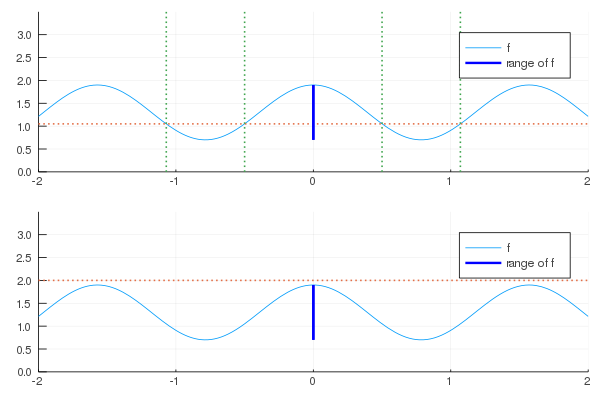

In [22]:
f(x)=0.6cos(4x)+1.3
grid=range(-2,2,length=100)
y_min,y_max=extrema(f(x) for x in grid)
plt1=plot(f,xlim=(-2,2),label="f")
hline!(plt1,[f(0.5)],linestyle=:dot,linewidth=2,label="")
vline!(plt1,[-1.07,-0.5,0.5,1.07],linestyle=:dot,linewidth=2,label="")
plot!(plt1,fill(0,2),[y_min y_min;y_max y_max],lw=3,color=:blue,label=["range of f" ""])
plt2=plot(f,xlim=(-2,2),label="f")
hline!(plt2,[2],linestyle=:dot,linewidth=2,label="")
plot!(plt2,fill(0,2),[y_min y_min;y_max y_max],lw=3,color=:blue,label=["range of f" ""])
plot(plt1,plt2,layout=(2,1),ylim=(0,3.5))


## Linear Equations with Julia


In [23]:
A=[1.0 2.0;3.0 4.0];
y=ones(2,1);
det(A)

-2.0

In [24]:
A_inv=inv(A)

2×2 Array{Float64,2}:
 -2.0   1.0
  1.5  -0.5

In [25]:
x=A_inv*y

2×1 Array{Float64,2}:
 -0.9999999999999998
  0.9999999999999999

In [26]:
A*x

2×1 Array{Float64,2}:
 1.0
 1.0000000000000004

In [27]:
A\y

2×1 Array{Float64,2}:
 -1.0
  1.0

# Eigenvalues and Eigenvectors

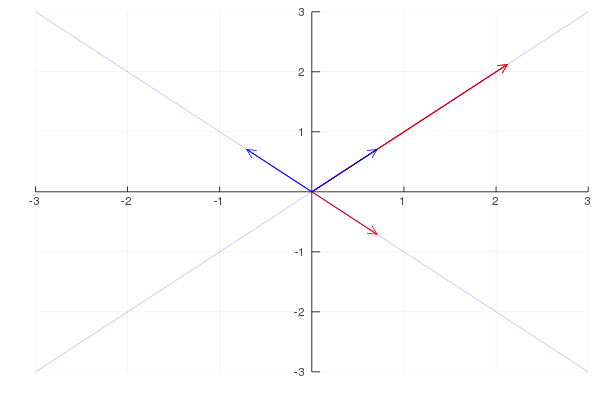

In [32]:
A=[1 2
2 1]
evals,evecs=eigen(A)

a1,a2=evals
eig_1=[0 0;evecs[:,1]']
eig_2=[0 0;evecs[:,2]']
x= range(-5,5,length=10)
y=-x

plot(eig_1[:,2],a1*eig_2[:,2],arrow=true,color=:red,
legend = :none, xlims=(-3,3),ylims=(-3,3),xticks=-3:3,yticks=-3:3,framestyle=:origin)
plot!(a2*eig_1[:,2],a2*eig_2,arrow=true,color=:red)
plot!(eig_1,eig_2,arrow=true,color=:blue)
plot!(x,y,color=:blue,lw=0.4,alpha=0.6)
plot!(x,x,color=:blue,lw=0.4,alpha=0.6)

* note: `alpha` in `plot` specifies a degree of transparent

* solving for the eigen values and eigen vectors of a matrix

In [33]:
A=[1.0 2.0; 2.0 1.0];
evals, evecs=eigen(A);
evals

2-element Array{Float64,1}:
 -1.0
  3.0

In [34]:
evecs

2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107

* The columns of `evecs` are the eigenvectors